<a href="https://colab.research.google.com/github/maryamalzahrani/CP3_2_DRL_template/blob/main/W5C2_template_checkpoint_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")


In [3]:
! curl https://raw.githubusercontent.com/maryamalzahrani/w5c2/master/ActMng-checkpoint.py?token=AV6BCKOD3JDYVC4S4H5PNS3BRP3P2 --output ActMng.py


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5849  100  5849    0     0   101k      0 --:--:-- --:--:-- --:--:--  101k


In [4]:
from ActMng import AccountManager

In [5]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [6]:
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


In [7]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].iplot()

In [8]:
df

,Open,Close,ma_fast,ma_slow
Date,,,,
2020-01-02,323.540009,324.869995,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN
2020-01-08,322.940002,324.450012,NaN,NaN
...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498
2021-11-05,469.279999,468.529999,462.054993,458.384997
2021-11-08,469.700012,468.929993,464.359996,459.879166


In [9]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df.head(60)

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2020-01-02,323.540009,324.869995,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN
2020-01-08,322.940002,324.450012,NaN,NaN,NaN
2020-01-09,326.160004,326.649994,322.885000,NaN,NaN
2020-01-10,327.290009,325.709991,323.510000,NaN,NaN
2020-01-13,326.390015,327.950012,324.381668,NaN,NaN
2020-01-14,327.470001,327.450012,325.545003,NaN,NaN


In [10]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']
df_trades['trade']

Date
2020-01-29    Short
2020-02-07     Long
2020-02-25    Short
2020-03-31     Long
2020-05-08    Short
2020-05-12     Long
2020-05-20    Short
2020-05-21     Long
2020-06-17    Short
2020-07-07     Long
2020-07-30    Short
2020-08-03     Long
2020-09-10    Short
2020-10-02     Long
2020-10-22    Short
2020-11-06     Long
2021-02-01    Short
2021-02-08     Long
2021-02-23    Short
2021-03-12     Long
2021-03-25    Short
2021-04-01     Long
2021-05-11    Short
2021-05-25     Long
2021-06-21    Short
2021-06-28     Long
2021-07-21    Short
2021-07-27     Long
2021-08-20    Short
2021-08-26     Long
2021-09-14    Short
2021-10-13     Long
Name: trade, dtype: object

In [11]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[10]=('Long' if df['trade_direction'].iloc[0]==10 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None
...,...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0,None
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0,None
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None


In [12]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(
    symbol=symbol,
    trades_df=df,
    starting_capital=starting_capital,
    allocation_amount=allocation)

results = trading_strategy.run()

In [13]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,243.62,1.0
2020-02-03,SPY,2020-02-03 00:00:00,At Market Open,BUY,MARKET,323.350006,243.62,1.0
2020-02-03,SPY,2020-02-03 00:00:00,At Market Open,SELL,MARKET,323.350006,250.44,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,250.44,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,237.61,1.0
...,...,...,...,...,...,...,...,...
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,224.43,1.0
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,224.47,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,224.47,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,236.94,1.0


In [14]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None,100000.000000,100000.000000,0.00,0.00,0.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None,100000.000000,100000.000000,0.00,0.00,0.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None,100000.000000,100000.000000,0.00,0.00,0.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None,100000.000000,100000.000000,0.00,0.00,0.0
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None,100000.000000,100000.000000,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,465.359985,466.910004,459.751658,456.872498,1.0,None,136376.213742,25746.557474,236.94,0.00,0.0
2021-11-05,469.279999,468.529999,462.054993,458.384997,1.0,None,136760.055385,25746.557474,236.94,0.00,0.0
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None,136854.829939,25746.557474,236.94,0.00,0.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None,136487.575831,25746.557474,236.94,0.00,0.0


absolute_return_tf: %36.0
CAGR_tf: % 19.0
information_ratio_tf: 1.0282


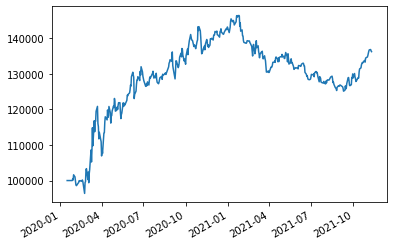

In [15]:
#Todo:
r_df = results['result_df']


# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"absolute_return_tf: %{np.round(absolute_return_tf,2)*100}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
print(f"CAGR_tf: % {np.round(CAGR_tf,2)*100}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252) **0.5)
print(f"information_ratio_tf: {np.round(information_ratio_tf,4)}")

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.plot()

In [16]:
np.nanmean(r_df.account_val.pct_change())

0.0007407420750016123

In [17]:
#Todo:
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = ((r_df.Close.iloc[-1])**(252/len(df)))-1
# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*10000).iplot()

In [18]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol, dates and trend parameters changes the performance
# Can you beat the reference implementation?